
**Created by:**

__Viktor Varga__

<br>

<img src="https://docs.google.com/uc?export=download&id=1q8cQBQKSLqS3PirWEmtQyObewgHOVISl" style="display:inline-block" width='40%'>
<hr>

# Lineáris regresszió gradiens módszerrel

Az adatbázisok forrása: http://www.dcc.fc.up.pt/~ltorgo/Regression/DataSets.html

Importok.

In [ ]:
import numpy as np
import urllib
import urllib.request

import matplotlib.pyplot as plt

Feature scaling metódusok: egy az átlag és a szórás feature-önkénti számolására, majd a minta ezekkel történő normalizálására és egy másik ami már számolt átlag és szórás alapján normalizál egy mintát.

In [ ]:
def std_normalization(data):
    # params: data: ndarray(n_samples, n_features)
    data = np.asarray(data, dtype=np.float64)
    eps = 0.0000001
    x_mean = np.mean(data, axis=0)
    x_std = np.std(data, axis=0)
    x_norm = (data-x_mean) / (x_std + eps)

    return x_norm, x_mean, x_std

def std_normalize_with_given_meanstd(data, x_mean, x_std):
    eps = 0.0000001
    x_norm = (data-x_mean) / (x_std + eps)
    return x_norm

Adatbetöltés ("Wine Quality Data Set" from the UCI ML repository).

**Feladat:** Borok minőségét értékeljük egy 10-es skálán a bor kémiai összetevői alapján.

In [ ]:
url = 'https://nipg12.inf.elte.hu/~vavsaai@nipg.lab/annbsc24_p1/files/winequality-red.csv'

ftpstream = urllib.request.urlopen(url)
content_reg = ftpstream.read().decode('utf-8')

Adatfeldolgozás: text fájlból numpy tömb.

In [ ]:
lines = content_reg.split('\n')
words = [line.split(';') for line in lines]
attr_names = words[0]
data = words[1:1001]
data = [[float(item) for item in rec] for rec in data]
data = np.array(data, dtype=np.float32)

features = data[:,:-1]
labels = data[:,-1]

print("Data attributes:")
print(attr_names)
print(features.shape)
print(labels.shape)



Data attributes:
['"fixed acidity"', '"volatile acidity"', '"citric acid"', '"residual sugar"', '"chlorides"', '"free sulfur dioxide"', '"total sulfur dioxide"', '"density"', '"pH"', '"sulphates"', '"alcohol"', '"quality"']
(1000, 11)
(1000,)


X, Y kiválasztása, tanító és teszt halmaz szétválasztása.

In [ ]:
X_train = features[:500]
y_train = labels[:500]
X_test = features[500:]
y_test = labels[500:]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(500, 11)
(500,)
(500, 11)
(500,)


Lineáris regresszió osztály.

In [ ]:
class LinearRegression:
    def __init__(self, lr=0.01, num_iter=10000, fit_intercept=True):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.eps = 0.00000001

    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    def __loss(self, h, y):
        return np.mean(np.square(h - y))

    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        # weights initialization
        self.theta = np.zeros(X.shape[1])

        loss_vals = []
        for i in range(self.num_iter):
            h = np.dot(X, self.theta)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient

            h = np.dot(X, self.theta)
            loss = self.__loss(h, y)
            loss_vals.append(loss)

        return loss_vals

    def predict(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        return np.dot(X, self.theta)


Feature scaling.

In [ ]:
X_train_n, x_mean, x_std = std_normalization(X_train)
X_test_n = std_normalize_with_given_meanstd(X_test, x_mean, x_std)

Tanítás és kiértékelés.

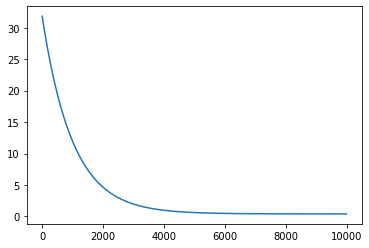

Training mean absolute error: 0.49925077628697545
Test mean absolute error: 0.5078567050299465


In [ ]:
#     if features are not scaled to same magnitude higher learning rate causes big fluctuations
#model = LinearRegression(lr=0.00001, num_iter=50000)

model = LinearRegression(lr=0.0005, num_iter=10000)

loss = model.fit(X_train_n, y_train)

plt.plot(loss)
plt.show();

preds_train = model.predict(X_train_n)
print("Training mean absolute error: " + str(np.fabs(preds_train - y_train).mean()))
preds_test = model.predict(X_test_n)
print("Test mean absolute error: " + str(np.fabs(preds_test - y_test).mean()))

**Konklúzió:** A betanult modell a teszthalmazon 0.5 körüli átlagos abszolút hibával találta el a borok 1-10-es skálán értelmezett minőségi értékelését. Tekintve, hogy az adatbázisban a legtöbb bor értékelése 3 és 8 közé esik ez nem olyan eget rengetően jó eredmény. Vajon minőséginek tartott borként ugyanazt isszuk, mint egy olcsóbb változat esetén és puszta sznobizmus bizonyos borokat minőséginek nevezni? Vagy esetleg a kémiai összetevők lineáris függvényével nem közelíthető jól a szakértők által adott minőség címke és bonyolultabb modellre lenne szükség?

Lineáris regresszió több python könyvtárban már implementálva van. Egy implementáció (normálegyenletes megoldással) az sklearn csomagból:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html